In [1]:
import os
import random
from PIL import Image

input_folder = "/content/drive/MyDrive/graphite original photos"  # This folder should contain "92%" and "98%" as subfolders
output_base_folder = "/content/drive/MyDrive/Lower Images"
new_size = (1920, 1080)  # Set your industrial camera/emulated resolution

# Define split ratios
split_ratios = {'train': 0.65, 'validation': 0.1, 'test': 0.25}
splits = ['train', 'validation', 'test']

# Create output directory structure
for split in splits:
    for category in os.listdir(input_folder):
        os.makedirs(os.path.join(output_base_folder, split, category), exist_ok=True)

# Process files for each category
for category in os.listdir(input_folder):
    cat_path = os.path.join(input_folder, category)
    if not os.path.isdir(cat_path):
        continue
    images = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)
    n = len(images)
    n_train = int(n * split_ratios['train'])
    n_val = int(n * split_ratios['validation'])
    n_test = n - n_train - n_val
    split_files = {
        'train': images[:n_train],
        'validation': images[n_train:n_train+n_val],
        'test': images[n_train+n_val:]
    }
    for split in splits:
        for img_name in split_files[split]:
            img_path = os.path.join(cat_path, img_name)
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                # Use Resampling.LANCZOS instead of ANTIALIAS
                img = img.resize(new_size, Image.Resampling.LANCZOS)
                save_path = os.path.join(output_base_folder, split, category, img_name)
                img.save(save_path)

In [2]:

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [3]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:

train_data_dir = "/content/drive/MyDrive/Lower Images/train"
test_data_dir = "/content/drive/MyDrive/Lower Images/test"
val_data_dir = "/content/drive/MyDrive/Lower Images/validation"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         )

validation_data = tf.keras.utils.image_dataset_from_directory(val_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 854 files belonging to 2 classes.
Found 130 files belonging to 2 classes.
Found 332 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['92%', '97%']

In [8]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


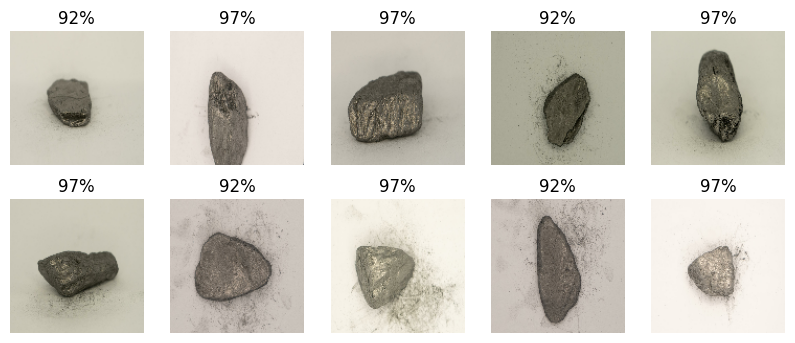

In [9]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[212.      206.      194.     ]
   [212.      206.      192.     ]
   [212.      206.      192.     ]
   ...
   [209.      203.      189.     ]
   [209.      203.      189.     ]
   [208.      202.      188.     ]]

  [[211.      205.      193.     ]
   [212.      206.      192.     ]
   [212.      206.      192.     ]
   ...
   [209.      203.      189.     ]
   [209.      203.      189.     ]
   [208.      202.      188.     ]]

  [[212.      206.      194.     ]
   [212.      206.      194.     ]
   [212.      206.      194.     ]
   ...
   [208.      202.      188.     ]
   [209.      203.      191.     ]
   [208.40625 202.40625 188.40625]]

  ...

  [[202.      196.      184.     ]
   [203.40625 197.40625 185.40625]
   [203.      197.      185.     ]
   ...
   [197.      193.      182.     ]
   [196.      192.      181.     ]
   [197.      193.      182.     ]]

  [[202.      196.      184.     ]
   [203.      197.      185.     ]
   [203.      197.      185.     ]
 

In [11]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [12]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   ...
   [0.9607843  0.93333334 0.9019608 ]
   [0.9529412  0.9254902  0.89411765]
   [0.95686275 0.92941177 0.8980392 ]]

  [[0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   ...
   [0.9607843  0.93333334 0.9019608 ]
   [0.95686275 0.92941177 0.8980392 ]
   [0.95686275 0.92941177 0.8980392 ]]

  [[0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   [0.972549   0.95686275 0.92156863]
   ...
   [0.9607843  0.93333334 0.9019608 ]
   [0.9607843  0.93333334 0.9019608 ]
   [0.95686275 0.92941177 0.8980392 ]]

  ...

  [[0.972549   0.9529412  0.92941177]
   [0.972549   0.9529412  0.92941177]
   [0.972549   0.9529412  0.92941177]
   ...
   [0.95686275 0.92941177 0.8980392 ]
   [0.95686275 0.92941177 0.8980392 ]
   [0.95686275 0.92941177 0.8980392 ]]

  [[0.9764706  0.95686275 0.933333

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

In [15]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
start_time = time.time()
history = model.fit(train_data,
                    epochs=6,
                    validation_data=validation_data)

end_time = time.time()


Epoch 1/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 31s 758ms/step - accuracy: 0.6644 - loss: 0.5959 - val_accuracy: 0.8077 - val_loss: 0.4549
Epoch 2/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.8469 - loss: 0.3719 - val_accuracy: 0.8538 - val_loss: 0.3612
Epoch 3/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.8718 - loss: 0.2860 - val_accuracy: 0.7923 - val_loss: 0.5066
Epoch 4/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.9138 - loss: 0.2082 - val_accuracy: 0.9154 - val_loss: 0.3137
Epoch 5/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.9451 - loss: 0.1425 - val_accuracy: 0.9308 - val_loss: 0.2935
Epoch 6/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.9945 - loss: 0.0521 - val_accuracy: 0.9154 - val_loss: 0.3675


In [19]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 87.031 seconds


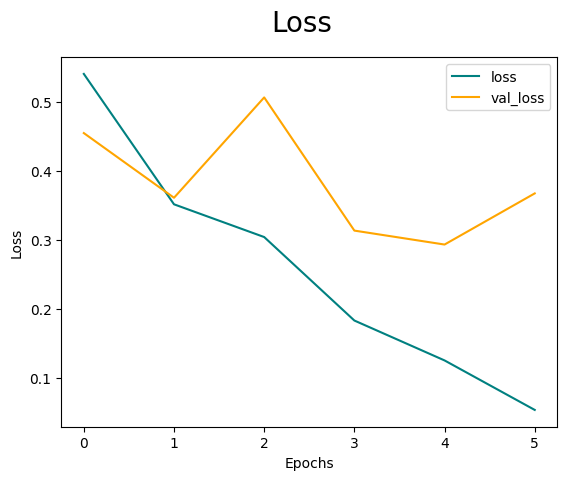

In [20]:


fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')      # Name for the x-axis
plt.ylabel('Loss')        # Name for the y-axis
plt.legend()
plt.show()


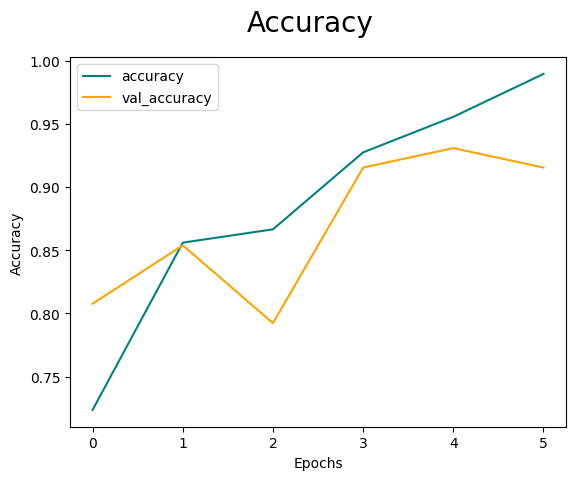

In [21]:


fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epochs')      # Label for the x-axis
plt.ylabel('Accuracy')    # Label for the y-axis
plt.legend()
plt.show()


In [22]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [23]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [24]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8888888955116272>

In [25]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8571428656578064>

In [26]:
accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.8734939694404602>

#**TEST**

In [27]:
!pip install opencv-python -q

In [28]:
import cv2



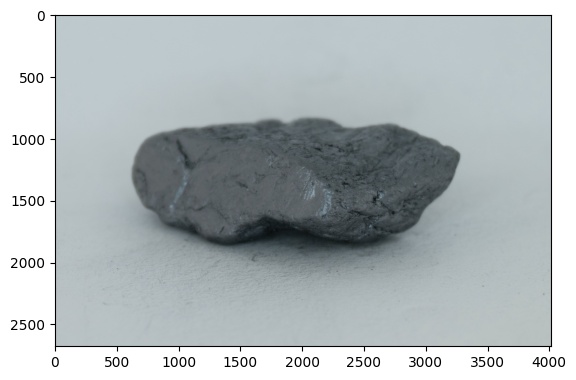

In [30]:
img = cv2.imread('/content/drive/MyDrive/Lower Images/DSC00114.jpg')
plt.imshow(img)
plt.show()

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [33]:
scaled_image.shape


TensorShape([128, 128, 3])

In [34]:
np.expand_dims(scaled_image, 0).shape


(1, 128, 128, 3)

In [35]:
yhat = model.predict(np.expand_dims(scaled_image, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [36]:
yhat


array([[0.4693332]], dtype=float32)

In [37]:
class_names


['92%', '97%']

In [38]:

if yhat < 0.5:
    print(f'{class_names[0]}')
else:
    print(f'{class_names[1]}')

92%


In [40]:
from PIL import Image

img = Image.open("/content/drive/MyDrive/Lower Images/test/92%/DSC00020.jpg")
print("Resolution:", img.size)  # Outputs something like (4000, 3000)


Resolution: (1920, 1080)
